In [14]:
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
import datetime
from datetime import date, timedelta, datetime
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import talib as ta
from os import walk
from finta import TA
import yfinance as yf

In [15]:
StartingAmount = 500_000/505

import libaries

In [16]:
stock = "MSFT"
startDate = datetime.strptime('2021-08-01',"%Y-%m-%d")
offsetDate = timedelta(39)
startDate = startDate - offsetDate
endDate = datetime.strptime('2021-11-01',"%Y-%m-%d")
df = pd.read_csv("C:/Users/rohan/Desktop/SchoolWork/StockMarketSimulationIQP/RohanCode/Data/filter_30y_stock_csvs/{}.csv".format(stock))
df = df.rename(columns={"CLOSE": "Close", "VOLUME": "Volume", "OPEN":"Open","HIGH":"High","LOW":"Low"})

df['Datetime'] = pd.to_datetime(df['Datetime'])

df = df[~(df['Datetime'] < startDate)]
df = df[~(df['Datetime'] > endDate)]

df

# my_data = pd.DataFrame(df).to_numpy()
# np.set_printoptions(precision=10)
# print(my_data[1][0])

,Datetime,Open,High,Low,Adj Close,Volume,Price_Moving_Avg,Vol_Moving_Avg,ADX,RSI,Price Lower than MAVG,Volume Higher than MAVG
7363,2021-06-23 20:00:00,266.160004,267.850006,265.470001,266.690002,21446900,252.984999,2.298093e+07,18.379734,69.277374,False,True
7364,2021-06-24 20:00:00,266.230011,267.250000,264.760010,265.019989,25611100,253.717999,2.284715e+07,19.036428,65.243061,False,False
7365,2021-06-27 20:00:00,266.190002,268.899994,265.910004,268.720001,19590000,254.403666,2.270345e+07,20.017938,69.483242,False,True
7366,2021-06-28 20:00:00,268.869995,271.649994,267.980011,271.399994,19937800,255.277666,2.253570e+07,21.477856,72.134906,False,True
7367,2021-06-29 20:00:00,270.690002,271.359985,269.600006,270.899994,21656500,256.204999,2.258532e+07,22.833494,70.897164,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
7449,2021-10-25 20:00:00,311.000000,312.399994,308.600006,310.109985,28107300,297.845334,2.461458e+07,25.945509,64.650836,False,False
7450,2021-10-26 20:00:00,316.000000,326.100006,316.000000,323.170013,52588700,298.457001,2.542233e+07,28.231674,74.736017,False,False
7451,2021-10-27 20:00:00,324.329987,324.869995,321.359985,324.350006,26297900,299.094668,2.564723e+07,30.354541,75.418410,False,False
7452,2021-10-28 20:00:00,324.130005,332.000000,323.899994,331.619995,34744900,300.153001,2.542631e+07,32.842427,79.154257,False,False


In [6]:

# aroondown, aroonup = ta.AROON(df['High'], df['Low'], timeperiod=14)
# df['AroonDown'] = aroondown
# df['AroonUp'] = aroonup
# df['Fisher'] =TA.IFT_RSI(df)


In [17]:
daysHistory = len(df['Adj Close'])
df = df[df['Price_Moving_Avg'].notna()]
df = df.dropna()

len(df)

91

In [21]:
close_price = df["Adj Close"]
mavgplot = df["Price_Moving_Avg"]
vmagplot = df["Vol_Moving_Avg"]
volumePlot = df['Volume']
rsiPlot = df['RSI']
adxPlot = df['ADX']

mpl.rc('figure',figsize=(15,10))
#mpl.style.use('ggplot')

close_price.plot(label=(stock+" Price"),legend=True,color='blue')
mavgplot.plot(label = 'Moving Avg of Price',legend=True,color='orange')
vmagplot.plot(secondary_y=True,label='Volume Avg',legend = True,color='red')
volumePlot.plot(label ='Volume',secondary_y=True,legend =False,color = 'green')

plt.xlabel("X axis label")
plt.ylabel("X axis label")
plt.legend(loc="upper right")
plt.title("Price and Volume compared to their Moving Average(window=30)")
plt.tight_layout()
plt.savefig('{}.png'.format("AllMAVG"),facecolor = 'w')
plt.close()
#AddPriceMoving Avg

In [22]:

volumePlot.plot(label ='Volume',secondary_y=False,legend =False,color = 'green')
vmagplot.plot(secondary_y=False,label='Volume Avg',legend = True,color='red')
plt.xlabel("Time Stamp on Row")
plt.ylabel("Volume Units")
plt.title("Volume in respects to its Moving Average")
plt.legend()
plt.tight_layout()
plt.savefig('{}.png'.format("VolumeMAVG"),facecolor = 'w')
plt.close()

In [23]:
close_price.plot(label=(stock+" Price"),legend=True,color='blue')
mavgplot.plot(label = 'Moving Avg of Price',legend=True,color='orange')
plt.xlabel("Time Stamp on Row")
plt.ylabel("Price $")
plt.title("Price in respects to its Moving Average")
#plt.legend()
plt.tight_layout()
plt.savefig('{}.png'.format("PriceMAVG"),facecolor = 'w')
plt.close()

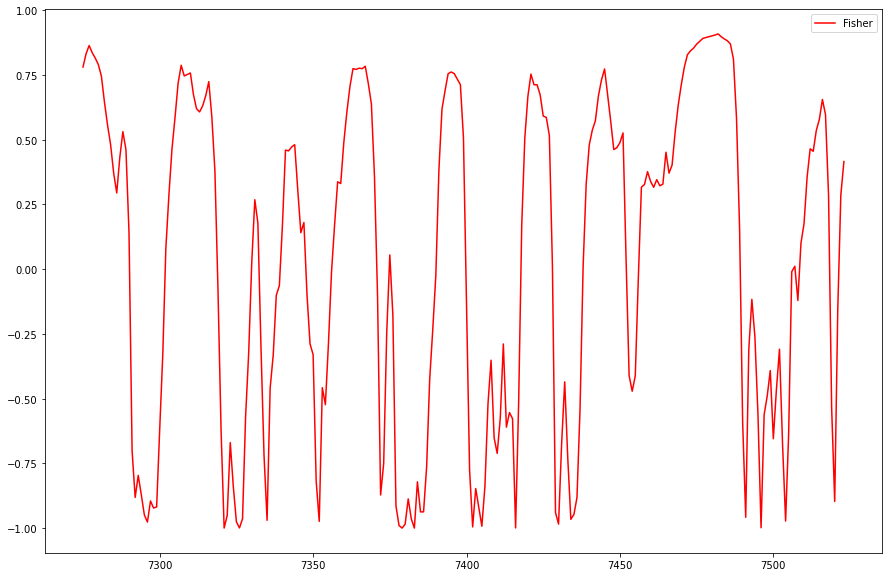

In [237]:
# up.plot(label=("UP"),legend=True,color='blue')
# down.plot(label = 'Down',legend=True,color='red')
f = df['Fisher']
f.plot(label = 'Fisher',legend=True,color='red')

#mpl.pyplot.legend()
mpl.pyplot.show()



In [238]:
df['Price Lower than MAVG'] = df['Price_Moving_Avg'].gt(df['Close'])
# adj close . lt - Price moving

df['Volume Higher than MAVG'] = df['Vol_Moving_Avg'].gt(df['Volume'])

df

,Datetime,Open,High,Low,Close,Volume,Price_Moving_Avg,Vol_Moving_Avg,ADX,RSI,AroonDown,AroonUp,Fisher,Price Lower than MAVG,Volume Higher than MAVG
7275,2021-01-06 20:00:00,758.489990,774.000000,749.099976,755.979980,44700000,635.982001,5.251109e+07,30.620162,75.005645,7.142857,100.000000,0.780826,False,True
7276,2021-01-07 20:00:00,777.630005,816.989990,775.200012,816.039978,51498900,645.788334,5.255237e+07,32.708499,80.014279,0.000000,100.000000,0.831911,False,True
7277,2021-01-08 20:00:00,856.000000,884.489990,838.390015,880.020020,75055500,656.609668,5.326594e+07,35.241227,83.750001,21.428571,100.000000,0.863888,False,False
7278,2021-01-11 20:00:00,849.400024,854.429993,803.619995,811.190002,59301600,664.516001,5.361165e+07,36.355766,68.841807,14.285714,92.857143,0.836399,False,False
7279,2021-01-12 20:00:00,831.000000,868.000000,827.340027,849.440002,46270700,673.305334,5.390197e+07,37.536393,71.841569,7.142857,85.714286,0.815408,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,2021-12-23 20:00:00,1006.799988,1072.979980,997.559998,1067.000000,30904400,1041.764337,2.503570e+07,19.357611,55.920663,85.714286,0.000000,-0.533676,False,False
7520,2021-12-27 20:00:00,1073.670044,1117.000000,1070.719971,1093.939941,23715300,1042.778668,2.507965e+07,19.764226,58.354123,78.571429,100.000000,-0.897321,False,True
7521,2021-12-28 20:00:00,1109.489990,1119.000000,1078.420044,1088.469971,20108000,1044.613666,2.491051e+07,20.167000,57.658102,71.428571,100.000000,-0.155946,False,True
7522,2021-12-29 20:00:00,1098.640015,1104.000000,1064.140015,1086.189941,18718000,1047.040330,2.437526e+07,20.228091,57.351036,64.285714,92.857143,0.286719,False,True


In [239]:

PL=0.00
Total_Gain =0
starting_price =1
#PG -> Per_Gain

Start_Price = (df['Close'].head(1))
Start_Price = float(Start_Price)
print("Start Price:", Start_Price)

End_Price = (df['Close'].tail(1))
End_Price = float(End_Price)
print("End Price:", End_Price)

Return = (PL/Start_Price)
Return_Per = "{:.2%}".format(Return)



benchRe = End_Price - Start_Price
benchREP = (benchRe/Start_Price) 
TotalPro = (benchREP) * StartingAmount
print(TotalPro)

Start Price: 755.97998046875
End Price: 1070.3399658203125
411.71395842530234


In [240]:
TotalReturn = StartingAmount
index =0
bought = False
# for date_var,row in df.iterrows():
#     maxValue = df.iloc[index-30:index]['Close'].max()
#     if(math.isnan(maxValue)):
#         maxValue = 0
#     if row['Volume Higher than MAVG']==1:
#         if row['Price Lower than MAVG']==1:
#             if z==1:
#                 print(date_var,row['Close'], '- BUY')
#                 close_adj = row['Close']
#                 starting_price = close_adj
#                 z -=1
                
#     elif(df.iloc[index-1]['Close']>=(maxValue) and maxValue !=0):
#         if z==1:
#                 print(date_var,row['Close'], '- BUYING BC OF TREND INCREASE')
#                 close_adj = row['Close']
#                 starting_price = close_adj
#                 z -=1
#     else:
#         if row['Volume Higher than MAVG']==0 and row['Price Lower than MAVG']==0 :
#                 if z==0:
#                     print(date_var,row['Close'],'- SELL')
#                     close_adj = row['Close']
#                     single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
#                     Total_Gain += single_trade_percent_gain

#                     print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
#                     print()
#                     z+=1
#         else:
#             if (((df.iloc[index-1]['Close']- starting_price)/starting_price) * 100) > .5:
#                 if z==0:
#                     print(date_var,row['Close'],'- SELL DUE TO PRICE INCREASE')
#                     close_adj = row['Close']
#                     single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
#                     Total_Gain += single_trade_percent_gain
#                     print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
#                     print()
#                     z+=1
#     index +=1

# for date_var,row in df.iterrows():
#     maxValue = df.iloc[index-30:index]['Close'].max()
#     if(math.isnan(maxValue)):
#         maxValue = 0

#     if(z==1):
#         if row['Volume Higher than MAVG']==1:
#             if row['Price Lower than MAVG']==1:
#                 if z==1:
#                     print(row['Datetime'],row['Close'], '- BUY')
#                     close_adj = row['Close']
#                     starting_price = close_adj
#                     z -=1
#     elif(row['ADX']>18):
#         if(z==1):
#             if(row['RSI']<=30):
#                     print(row['Datetime'],row['Close'], '- Buy due to Over-Buy')
#                     close_adj = row['Close']
#                     starting_price = close_adj
#                     z -=1
#             elif(row['Close']>=(maxValue) and maxValue !=0):
#                     print(row['Datetime'],row['Close'], '- BUYING BC OF TREND INCREASE')
#                     close_adj = row['Close']
#                     starting_price = close_adj
#                     z -=1
#         else:
#             if(z==0):
#                 if (((row['Close']- starting_price)/starting_price) * 100) > .5:
#                         if z==0:
#                             print(row['Datetime'],row['Close'],'- SELL DUE TO PRICE INCREASE')
#                             close_adj = row['Close']
#                             single_trade_percent_gain = ((close_adj - starting_price) / starting_price) 
#                             Total_Gain += single_trade_percent_gain
#                             print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
#                             print()
#                             z+=1
#                 elif row['Volume Higher than MAVG']==0 and row['Price Lower than MAVG']==0 :
#                         if z==0:
#                             print(row['Datetime'],row['Close'],'- SELL')
#                             close_adj = row['Close']
#                             single_trade_percent_gain = ((close_adj - starting_price) / starting_price) 
#                             Total_Gain += single_trade_percent_gain

#                             print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
#                             print()
#                             z+=1
#                 else:
#                     if (row['RSI']>=60):
#                         if z==0:
#                             print(row['Datetime'],row['Close'],'- Oversell because of RSI')
#                             close_adj = row['Close']
#                             single_trade_percent_gain = ((close_adj - starting_price) / starting_price) 
#                             Total_Gain += single_trade_percent_gain
#                             print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
#                             print()
#                             z+=1
#     index +=1
#     TotalReturn = (1+Total_Gain)*TotalReturn
#     Total_Gain = 0


#ADX
    #Tells how strong the trend is
        #Anything above 30 is a strong trend

#RSI
    #Tells if there is an over buy or over sell
        #From 0-30
            #Over sell
        #From 30-70
            #Normal
        #70-100
            #Over buy

for date_var,row in df.iterrows():
    maxValue = df.iloc[index-5:index]['Close'].max()
    if math.isnan(maxValue):
        maxValue = 0

    if(df.iloc[index-1]['ADX']>15):
        if not bought:
            if df.iloc[index-1]['Volume Higher than MAVG']==1 and df.iloc[index-1]['Price Lower than MAVG']==1:
                print(row['Datetime'],row['Close'], '- Buy due to Volume + price')
                close_adj = row['Close']
                starting_price = close_adj
                bought = True
            elif df.iloc[index-1]['Close'] > maxValue and maxValue != 0:
                print(row['Datetime'],row['Close'], '- Buy due to threshold')
                close_adj = row['Close']
                starting_price = close_adj
                bought = True
            elif df.iloc[index-1]['RSI'] > 55:
                print(row['Datetime'],row['Close'], '- Buy due to over buy')
                close_adj = row['Close']
                starting_price = close_adj
                bought = True     
    if bought and close_adj != row['Close']:
        if (df.iloc[index-1]['Volume Higher than MAVG']==0 or df.iloc[index-1]['RSI'] < 55) and df.iloc[index-1]['Price Lower than MAVG']==0 :
                print(row['Datetime'],row['Close'],'- Sell due to over sell')
                close_adj = row['Close']
                single_trade_percent_gain = ((close_adj - starting_price) / starting_price) 
                Total_Gain += single_trade_percent_gain
                print("This trade gain/loss results: "+str(round(single_trade_percent_gain*100,2))+"%")
                print()
                bought = False
        elif (((df.iloc[index-1]['Close']- starting_price)/starting_price) * 100) > (.5 * 100):
                print(row['Datetime'],row['Close'],'- Sell due money made')
                close_adj = row['Close']
                single_trade_percent_gain = ((close_adj - starting_price) / starting_price) 
                Total_Gain += single_trade_percent_gain
                print("This trade gain/loss results: "+str(round(single_trade_percent_gain*100,2))+"%")
                print()
                bought = False

        elif df.iloc[index-1]['Close'] < maxValue and maxValue != 0: 
                print(row['Datetime'],row['Close'],'- Sell due to threshold down')
                close_adj = row['Close']
                single_trade_percent_gain = ((close_adj - starting_price) / starting_price) 
                Total_Gain += single_trade_percent_gain
                print("This trade gain/loss results: "+str(round(single_trade_percent_gain*100,2))+"%")
                print()
                bought = False

        index +=1
        TotalReturn = (1 + Total_Gain) * TotalReturn
        Total_Gain = 0


if bought:
    print(row['Datetime'],row['Close'],'- SELL DUE TO LAST DAY')
    close_adj = row['Close']
    single_trade_percent_gain = ((close_adj - starting_price) / starting_price) 
    Total_Gain += single_trade_percent_gain
    print("This trade gain/loss results: {}%".format(round(single_trade_percent_gain*100,2)))
    TotalReturn = (1+Total_Gain)*TotalReturn
    Total_Gain = 0

Hold_Return = (End_Price - Start_Price)
Hold_Return_Per = "{:.2%}".format((End_Price-Start_Price)/Start_Price)
#TotalReturn = (Total_Gain+StartingAmount)
Total_Gain = ((TotalReturn - StartingAmount)/StartingAmount) 




print("The return for holding start to end was: "+str(Hold_Return_Per)+".")

print("Return percentage from all trades: " + str(round(Total_Gain*100,2))+"% based on "+str(daysHistory)+" days of data")
print("With a starting amount of: $"+str(round(StartingAmount,3))+" it ended with a profit of: $"+str(round(TotalReturn,3)))
print("This algoritm has gained you: $"+str(round(TotalReturn-StartingAmount,3)))






2021-01-06 20:00:00 755.97998046875 - Buy due to over buy
2021-01-12 20:00:00 849.4400024414062 - Sell due to over sell
This trade gain/loss results: 12.36%

2021-01-13 20:00:00 854.4099731445312 - Buy due to over buy
2021-01-14 20:00:00 845.0 - Sell due to over sell
This trade gain/loss results: -1.1%

2021-01-15 20:00:00 826.1599731445312 - Buy due to over buy
2021-01-19 20:00:00 844.5499877929688 - Sell due to threshold down
This trade gain/loss results: 2.23%

2021-01-20 20:00:00 850.4500122070312 - Buy due to over buy
2021-01-21 20:00:00 844.989990234375 - Sell due to threshold down
This trade gain/loss results: -0.64%

2021-01-22 20:00:00 846.6400146484375 - Buy due to over buy
2021-01-25 20:00:00 880.7999877929688 - Sell due to threshold down
This trade gain/loss results: 4.03%

2021-01-26 20:00:00 883.0900268554688 - Buy due to over buy
2021-01-27 20:00:00 864.1599731445312 - Sell due to threshold down
This trade gain/loss results: -2.14%

2021-01-28 20:00:00 835.4299926757812 

In [ ]:
 # for date_var,row in df.iterrows():
    #     maxValue = df.iloc[index-5:index]['Adj Close'].max()
    #     if math.isnan(maxValue):
    #         maxValue = 0

    #     if(df.iloc[index-1]['ADX']>22):
    #         if not bought and df.iloc[index-1]['RSI'] > 25:
    #             if df.iloc[index-1]['Volume Higher than MAVG']==1 and df.iloc[index-1]['Price Lower than MAVG']==1:
    #                     # print(row['Datetime'],row['Adj Close'], '- Buy due to Volume + price')
    #                     close_adj = row['Adj Close']
    #                     starting_price = close_adj
    #                     bought = True
    #             elif df.iloc[index-1]['Adj Close'] > maxValue and maxValue != 0:
    #                 # print(row['Datetime'],row['Adj Close'], '- Buy due to going above threshhold')
    #                 close_adj = row['Adj Close']
    #                 starting_price = close_adj
    #                 bought = True
    #         else:
    #             if bought:
    #                 if (df.iloc[index-1]['Volume Higher than MAVG']==0 or df.iloc[index-1]['RSI'] < 75) and df.iloc[index-1]['Price Lower than MAVG']==0 :
    #                         #print(row['Datetime'],row['Adj Close'],'- Sell due to volume change')
    #                         close_adj = row['Adj Close']
    #                         single_trade_percent_gain = ((close_adj - starting_price) / starting_price) 
    #                         Total_Gain += single_trade_percent_gain
    #                         # print("This trade gain/loss results: "+str(round(single_trade_percent_gain*100,2))+"%")
    #                         # print()
    #                         bought = False

    #                 elif df.iloc[index-1]['Adj Close'] < maxValue and maxValue != 0 : 
    #                         #print(row['Datetime'],row['Adj Close'],'- Sell due to going below threshhold')
    #                         close_adj = row['Adj Close']
    #                         single_trade_percent_gain = ((close_adj - starting_price) / starting_price) 
    #                         Total_Gain += single_trade_percent_gain
    #                         # print("This trade gain/loss results: "+str(round(single_trade_percent_gain*100,2))+"%")
    #                         # print()
    #                         bought = False
    #     index +=1
    #     TotalReturn = (1 + Total_Gain) * TotalReturn
    #     Total_Gain = 0


#Buy
# close_adj = row['Adj Close']
                        # starting_price = close_adj
                        # bought = True


#SELL

# close_adj = row['Adj Close']
                    # single_trade_percent_gain = ((close_adj - starting_price) / starting_price) 
                    # Total_Gain += single_trade_percent_gain
                    
                    # bought = False



# for date_var,row in df.iterrows():
#         maxValue = df.iloc[index-5:index]['Adj Close'].max()
#         if math.isnan(maxValue):
#             maxValue = 0
            
#         if not bought:
#             if(df.iloc[index-1]['ADX']>15): #If trend is appearing - See if its a good time to buy
#                 if df.iloc[index-1]['Volume Higher than MAVG']==1 and df.iloc[index-1]['Price Lower than MAVG']==1: 
#                         close_adj,starting_price,bought = buyStock(row)

#                 # elif df.iloc[index-1]['Adj Close'] > maxValue and maxValue != 0: #This doesnt work -- edit and relook
#                 #     close_adj,starting_price,bought = buyStock(row)
            
#                 # elif df.iloc[index-1]['RSI'] > 70:
#                 #     close_adj,starting_price,bought = buyStock(row)
               
#         elif bought and close_adj != row['Adj Close']: #This is sell clause
#             if (df.iloc[index-1]['Volume Higher than MAVG']==0 or df.iloc[index-1]['RSI'] < 35) and df.iloc[index-1]['Price Lower than MAVG']==0 :
                   
#                     infoOnSelling = sellStock(row,starting_price)
#                     close_adj = infoOnSelling[0]
#                     Total_Gain += infoOnSelling[1]
#                     bought = infoOnSelling[2]

                    
#             # elif (((df.iloc[index-1]['Adj Close']- starting_price)/starting_price) * 100) > (.5 * 100):
                   
#             #         infoOnSelling = sellStock(row,starting_price)
#             #         close_adj = infoOnSelling[0]
#             #         Total_Gain += infoOnSelling[1]
#             #         bought = infoOnSelling[2]

                    

#             # elif df.iloc[index-1]['Adj Close'] < maxValue and maxValue != 0: 
                    
#             #         infoOnSelling = sellStock(row,starting_price)
#             #         close_adj = infoOnSelling[0]
#             #         Total_Gain += infoOnSelling[1]
#             #         bought = infoOnSelling[2]

#         index +=1
#         TotalReturn = (1 + Total_Gain) * TotalReturn
#         Total_Gain = 0

In [ ]:
# for date_var, row in df.iterrows():
#         maxValuePeriod = df.iloc[index-7:index-1]['Adj Close'].max()
#         maxValuemean = df.iloc[index-7:index-1]['Adj Close'].mean()
#         maxValuemeanOld = df.iloc[index-14:index-7]['Adj Close'].mean()
#         stvalue = df.iloc[index-10:index-1]['Adj Close'].std()
        
#         if math.isnan(maxValuePeriod):
#             maxValuePeriod = 0
#         if math.isnan(maxValuemean):
#             maxValuemean = 0

#         if not bought:
#             # If trend is appearing - See if its a good time to buy
#             if(df.iloc[index-1]['ADX'] > 11):
#                 # if df.iloc[index-1]['Volume Higher than MAVG'] == 1 and df.iloc[index-1]['Price Lower than MAVG'] == 1:

#                 #     close_adj, starting_price, bought = buyStock(row)
#                 #     mapForBuy[row['Datetime']] = row['Adj Close']

#                 if (maxValuePeriod - (2* stvalue) < maxValuemean):
                    
#                     close_adj, starting_price, bought = buyStock(row)
#                     mapForBuy[row['Datetime']] = row['Adj Close']
                
#             else:
#                 gainsList.append(0)

#         elif bought and close_adj != row['Adj Close']:  # This is sell clause
#             # if (df.iloc[index-1]['Volume Higher than MAVG'] == 0 or df.iloc[index-1]['RSI'] < 40) and df.iloc[index-1]['Price Lower than MAVG'] == 0:
#             #     if(maxValuemeanOld > maxValuemean):
#             #         infoOnSelling = sellStock(row, starting_price)
#             #         close_adj = infoOnSelling[0]
#             #         Total_Gain += infoOnSelling[1]
#             #         bought = infoOnSelling[2]

#             #         gainsList.append(infoOnSelling[1])

#             #         if(infoOnSelling[1] >= 0):
#             #             mapForSellP[row['Datetime']] = row['Adj Close']

#             #         else:
#             #             lostList.append(infoOnSelling[1])
#             #             mapForSellN[row['Datetime']] = row['Adj Close']

#             if(maxValuemeanOld > maxValuemean and maxValuePeriod > maxValuemean):
#                 infoOnSelling = sellStock(row, starting_price)
#                 close_adj = infoOnSelling[0]
#                 Total_Gain += infoOnSelling[1]
#                 bought = infoOnSelling[2]

#                 gainsList.append(infoOnSelling[1])

#                 if(infoOnSelling[1] >= 0):
#                     mapForSellP[row['Datetime']] = row['Adj Close']

#                 else:
#                     lostList.append(infoOnSelling[1])
#                     mapForSellN[row['Datetime']] = row['Adj Close']

#             else:
#                 yesterday = df.iloc[index-1]['Adj Close']
#                 today = row['Adj Close']
#                 checker = (today - yesterday)/yesterday
#                 if(checker < 0):
#                     lostList.append(checker)
#                 gainsList.append(checker)

#         index += 1
#         TotalReturn = (1 + Total_Gain) * TotalReturn
#         Total_Gain = 0

In [ ]:
# Datetime-0
# OPEN-1
# HIGH-2
# LOW-3
# Adj Close-4
# Volume-5
# Price_Moving_Avg-6
# Vol_Moving_Avg-7
# ADX-8
# RSI-9
# Price Lower than MAVG-10
# Volume Higher than MAVG-11
StockData = []
for row in StockData:
    maxValuePeriod = np.max(StockData[index-7:index-1][4])
    maxValuemean = np.mean(StockData[index-7:index-1][4])
    maxValuemeanOld= np.mean(StockData[index-14:index-7][4])
    stvalue = np.std(StockData[index-10:index-1][4])

    if math.isnan(maxValuePeriod):
        maxValuePeriod = 0
    if math.isnan(maxValuemean):
        maxValuemean = 0

    if not bought:
        if(StockData[index-1][8] > 11):
            if (maxValuePeriod - (2* stvalue) < maxValuemean):
                    
                close_adj, starting_price, bought = buyStock(row)
                mapForBuy[row[0]] = row[4]
                
        else:
            gainsList.append(0)

    elif bought and close_adj != row[4]:  # This is sell clause
        if (StockData[index-1][11] == 0 or StockData[index-1][9] < 40) and StockData[index-1][10] == 0 and maxValuemeanOld > maxValuemean:
            infoOnSelling = sellStock(row, starting_price)
            close_adj = infoOnSelling[0]
            Total_Gain += infoOnSelling[1]
            bought = infoOnSelling[2]

            gainsList.append(infoOnSelling[1])

            if(infoOnSelling[1] >= 0):
                mapForSellP[row[0]] = row[4]

            else:
                lostList.append(infoOnSelling[1])
                mapForSellN[row[0]] = row[4]

        elif(maxValuemeanOld > maxValuemean and maxValuePeriod > maxValuemean):
            infoOnSelling = sellStock(row, starting_price)
            close_adj = infoOnSelling[0]
            Total_Gain += infoOnSelling[1]
            bought = infoOnSelling[2]

            gainsList.append(infoOnSelling[1])

            if(infoOnSelling[1] >= 0):
                mapForSellP[row[0]] = row[4]

            else:
                lostList.append(infoOnSelling[1])
                mapForSellN[row[0]] = row[4]

        else:
            yesterday = StockData[index-1][4]
            today = row[4]
            checker = (today - yesterday)/yesterday
            if(checker < 0):
                lostList.append(checker)
            gainsList.append(checker)
            
    index += 1
    TotalReturn = (1 + Total_Gain) * TotalReturn
    Total_Gain = 0











for date_var, row in df.iterrows():
        maxValuePeriod = df.iloc[index-7:index-1]['Adj Close'].max()
        maxValuemean = df.iloc[index-7:index-1]['Adj Close'].mean()
        maxValuemeanOld = df.iloc[index-14:index-7]['Adj Close'].mean()
        stvalue = df.iloc[index-10:index-1]['Adj Close'].std()
        
        if math.isnan(maxValuePeriod):
            maxValuePeriod = 0
        if math.isnan(maxValuemean):
            maxValuemean = 0

        if not bought:
            # If trend is appearing - See if its a good time to buy
            if(df.iloc[index-1]['ADX'] > 11):
                # if df.iloc[index-1]['Volume Higher than MAVG'] == 1 and df.iloc[index-1]['Price Lower than MAVG'] == 1:

                #     close_adj, starting_price, bought = buyStock(row)
                #     mapForBuy[row['Datetime']] = row['Adj Close']

                if (maxValuePeriod - (2* stvalue) < maxValuemean):
                    
                    close_adj, starting_price, bought = buyStock(row)
                    mapForBuy[row['Datetime']] = row['Adj Close']
                
            else:
                gainsList.append(0)

        elif bought and close_adj != row['Adj Close']:  # This is sell clause
            if (df.iloc[index-1]['Volume Higher than MAVG'] == 0 or df.iloc[index-1]['RSI'] < 40) and df.iloc[index-1]['Price Lower than MAVG'] == 0 and maxValuemeanOld > maxValuemean:
                infoOnSelling = sellStock(row, starting_price)
                close_adj = infoOnSelling[0]
                Total_Gain += infoOnSelling[1]
                bought = infoOnSelling[2]

                gainsList.append(infoOnSelling[1])

                if(infoOnSelling[1] >= 0):
                    mapForSellP[row['Datetime']] = row['Adj Close']

                else:
                    lostList.append(infoOnSelling[1])
                    mapForSellN[row['Datetime']] = row['Adj Close']

            elif(maxValuemeanOld > maxValuemean and maxValuePeriod > maxValuemean):
                infoOnSelling = sellStock(row, starting_price)
                close_adj = infoOnSelling[0]
                Total_Gain += infoOnSelling[1]
                bought = infoOnSelling[2]

                gainsList.append(infoOnSelling[1])

                if(infoOnSelling[1] >= 0):
                    mapForSellP[row['Datetime']] = row['Adj Close']

                else:
                    lostList.append(infoOnSelling[1])
                    mapForSellN[row['Datetime']] = row['Adj Close']

            else:
                yesterday = df.iloc[index-1]['Adj Close']
                today = row['Adj Close']
                checker = (today - yesterday)/yesterday
                if(checker < 0):
                    lostList.append(checker)
                gainsList.append(checker)

        index += 1
        TotalReturn = (1 + Total_Gain) * TotalReturn
        Total_Gain = 0

In [ ]:
# #Old version
# def trade(stock, startDate, endDate):
#     StartingAmount = 500_000/505

#     df = pd.read_csv(
#         "C:/Users/rohan/Desktop/SchoolWork/StockMarketSimulationIQP/RohanCode/Data/filter_30y_stock_csvs/{}.csv".format(stock))
#     df = df.rename(columns={"CLOSE": "Adj Close", "VOLUME": "Volume"})

#     df['Datetime'] = pd.to_datetime(df['Datetime'])

#     df = df[~(df['Datetime'] < startDate)]
#     df = df[~(df['Datetime'] > endDate)]

#     mapForBuy = {}
#     mapForSellP = {}
#     mapForSellN = {}

#     gainsList = []
#     lostList = []

#     Total_Gain = 0
#     starting_price = 1

#     TotalReturn = StartingAmount
#     index = 0
#     bought = False

#     for date_var, row in df.iterrows():
#         maxValuePeriod = df.iloc[index-7:index-1]['Adj Close'].max()
#         maxValuemean = df.iloc[index-7:index-1]['Adj Close'].mean()
#         maxValuemeanOld = df.iloc[index-14:index-7]['Adj Close'].mean()
#         stvalue = df.iloc[index-10:index-1]['Adj Close'].std()
        
#         if math.isnan(maxValuePeriod):
#             maxValuePeriod = 0
#         if math.isnan(maxValuemean):
#             maxValuemean = 0

#         if not bought:
#             # If trend is appearing - See if its a good time to buy
#             if(df.iloc[index-1]['ADX'] > 11):
#                 # if df.iloc[index-1]['Volume Higher than MAVG'] == 1 and df.iloc[index-1]['Price Lower than MAVG'] == 1:

#                 #     close_adj, starting_price, bought = buyStock(row)
#                 #     mapForBuy[row['Datetime']] = row['Adj Close']

#                 if (maxValuePeriod - (2* stvalue) < maxValuemean):
                    
#                     close_adj, starting_price, bought = buyStock(row)
#                     mapForBuy[row['Datetime']] = row['Adj Close']
                
#             else:
#                 gainsList.append(0)

#         elif bought and close_adj != row['Adj Close']:  # This is sell clause
#             if (df.iloc[index-1]['Volume Higher than MAVG'] == 0 or df.iloc[index-1]['RSI'] < 40) and df.iloc[index-1]['Price Lower than MAVG'] == 0 and maxValuemeanOld > maxValuemean:
#                 infoOnSelling = sellStock(row, starting_price)
#                 close_adj = infoOnSelling[0]
#                 Total_Gain += infoOnSelling[1]
#                 bought = infoOnSelling[2]

#                 gainsList.append(infoOnSelling[1])

#                 if(infoOnSelling[1] >= 0):
#                     mapForSellP[row['Datetime']] = row['Adj Close']

#                 else:
#                     lostList.append(infoOnSelling[1])
#                     mapForSellN[row['Datetime']] = row['Adj Close']

#             elif(maxValuemeanOld > maxValuemean and maxValuePeriod > maxValuemean):
#                 infoOnSelling = sellStock(row, starting_price)
#                 close_adj = infoOnSelling[0]
#                 Total_Gain += infoOnSelling[1]
#                 bought = infoOnSelling[2]

#                 gainsList.append(infoOnSelling[1])

#                 if(infoOnSelling[1] >= 0):
#                     mapForSellP[row['Datetime']] = row['Adj Close']

#                 else:
#                     lostList.append(infoOnSelling[1])
#                     mapForSellN[row['Datetime']] = row['Adj Close']

#             else:
#                 yesterday = df.iloc[index-1]['Adj Close']
#                 today = row['Adj Close']
#                 checker = (today - yesterday)/yesterday
#                 if(checker < 0):
#                     lostList.append(checker)
#                 gainsList.append(checker)

#         index += 1
#         TotalReturn = (1 + Total_Gain) * TotalReturn
#         Total_Gain = 0




#     if bought:
#         infoOnSelling = sellStock(row, starting_price)
#         close_adj = infoOnSelling[0]
#         Total_Gain += infoOnSelling[1]
#         bought = infoOnSelling[2]

#         gainsList.append(infoOnSelling[1])

#         if(infoOnSelling[1] >= 0):
#             mapForSellP[row['Datetime']] = row['Adj Close']

#         else:
#             lostList.append(infoOnSelling[1])
#             mapForSellN[row['Datetime']] = row['Adj Close']

#         TotalReturn = (1 + Total_Gain) * TotalReturn
#         Total_Gain = 0


#     plt.plot(df['Datetime'], df['Adj Close'])
#     plt.scatter(mapForBuy.keys(), mapForBuy.values(), label="Buy", color="Blue",
#                 marker="o", s=30)
#     plt.scatter(mapForSellP.keys(), mapForSellP.values(), label="Sell - Gain", color="Green",
#                 marker="^", s=30)
#     plt.scatter(mapForSellN.keys(), mapForSellN.values(), label="Sell - Lost", color="Red",
#                 marker="v", s=30)

#     plt.xlabel("Date")
#     plt.ylabel("Price $")
#     plt.title("{}".format(stock))
#     plt.tick_params(axis='x',which='major', labelsize=7, rotation = 90)
#     #plt.tick_params(axis='y',colors='white')
    
#     plt.legend()
#     plt.tight_layout()

#     plt.savefig('GraphsForBuySell/{}.png'.format(stock),facecolor = 'w')
#     plt.close()

#     tradingdays = (endDate-startDate).days
#     if not mapForBuy or not np.std(gainsList):
#         sharpeRatio = 0
#     else:
#         sharpeRatio = np.mean(gainsList)/np.std(gainsList)
#         sharpeRatio = (tradingdays ** 0.5) * sharpeRatio

#     if not lostList or not np.std(lostList):
#         sortinoRatio = 0
#     else:
#         sortinoRatio = (np.mean(gainsList)/np.std(lostList)) * (tradingdays ** 0.5)
    
#     return round(TotalReturn-StartingAmount, 2), sharpeRatio, sortinoRatio
